

<div class="alert alert-block alert-info">
  <b style="color: blue;">
    <h3>Explicación de cómo funciona las funciones auxiliares</h3></b>

En esta <code>notebook</code> explicamos cómo utilizar las funciones auxiliares del archivo <b>funciones_auxiliares_predicciones.py </b>

El cual contiene las siguientes funciones:
1. <b>seg_SLIC</b>
2. <b>extrac_features_sec</b>
3. <b>extrac_parallel_features</b>
5. <b>img_etiquetas_parallel</b>
5. <b>calcular_proporcion_pixeles</b>
6. <b>ver_superpixeles_categorias</b>
</div>

#
<div class="alert alert-block alert-success">
<b>Importacion de las librerias</b></div>

In [10]:
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
#                                           I M P O R T S
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

import cv2                      # Librería para procesamiento de imágenes (lectura, escritura, manipulación)
import os                       # Funciones para interactuar con el sistema de archivos (rutas, carpetas, etc.)
import pandas as pd             # Manipulación y análisis de datos tabulares (DataFrames)
import matplotlib.pyplot as plt # Visualización de gráficos básicos (líneas, barras, imágenes, etc.)
import seaborn as sns           # Visualización avanzada de datos estadísticos (mejor estilo que matplotlib)
import numpy as np              # Cálculo numérico, manejo de arrays y operaciones matemáticas vectorizadas
from sklearn.preprocessing import StandardScaler  # Estandarización de datos: media 0, varianza 1
import time                     # Para medir tiempos de ejecución (entrenamiento, predicción, etc.)
import joblib                   # Para guardar y cargar modelos entrenados en formato .pkl
import numpy as np              # Manipulación de los datos
# Verificación de carga exitosa
print("Todas las bibliotecas están funcionando correctamente!")



Todas las bibliotecas están funcionando correctamente!


<div class="alert alert-block alert-info">
  <strong>ℹ️ Llamada de la función <code>seg_SLIC</code></strong><br>
  Esta función segmenta la imagen mediante el método SLIC.<br> 

  La función tiene la siguiente estructura, y valores de los parametros por defecto:

  <b>seg_SLIC(path_image, parametro_1=40, parametro_2=10, parametro_3=10, parametro_4=20)</b>

  Párametros de entrada:
  <ul>
    <li><code>path_image</code>: Ruta de la imagen a segmentar</li>
    <li><code>parametro_1</code>: Tamaño aproximado de cada superpíxel.</li>
    <li><code>parametro_2</code>: Compacidad (ruler). Valores bajos siguen mejor los bordes.</li>
    <li><code>parametro_3</code>: Número de iteraciones del algoritmo. Mejora la precisión.</li>
    <li><code>parametro_4</code>: Tamaño mínimo permitido para un superpíxel</li>
  </ul>
</div>


In [3]:
from funciones_auxiliares_predicciones import seg_SLIC   # llamada de la funcion 

# Ruta de la imagen a segmentar 
rut_image = "image_x5_331.jpg"

# parámetros de segmentacion
tamano_superpixeles = 40   
ruler = 10                  
iteraciones = 10
tamano_minimo = 20         

# Llamar a la función
img_seg, Labels_slic, number_slic = seg_SLIC(
    path_image = rut_image,
    parametro_1=tamano_superpixeles,
    parametro_2=ruler,
    parametro_3=iteraciones,
    parametro_4=tamano_minimo
)

<div class="alert alert-block alert-info">
  <strong>📤 Valores de salida de la función <code>seg_SLIC</code></strong><br>
  La función retorna una tupla con los siguientes elementos:
  <ul>
    <li><code>img_seg</code>: Imagen segmentada.</li>
    <li><code>Labels_slic</code>:Es una matriz que indica a qué superpíxel pertenece cada píxel de la imagen, en otras palabras es como una etiqueta por píxel, donde:</li>
    <ul>
     <li>Cada número representa un superpíxel diferente
     <li>Todos los píxeles que comparten el mismo número pertenecen a la misma región o superpíxel.
    </ul>
    <li><code>number_slic</code>: Número de superpíxeles.</li>
  </ul>
</div>

Número de superpixeles 1104


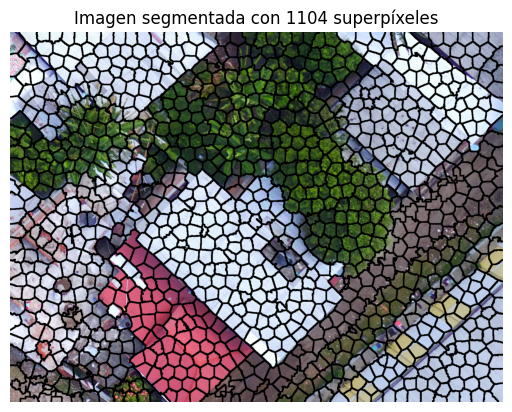

In [4]:
print(f"Número de superpixeles {number_slic}")
plt.imshow(img_seg)
plt.axis("off")
plt.title(f"Imagen segmentada con {number_slic} superpíxeles")
plt.show()

<div class="alert alert-block alert-info"> <strong>ℹ️ Llamada de la función <code>extrac_features_sec</code></strong><br> Esta función realiza segmentación de la imagen mediante SLIC y extrae características estadísticas, de textura y bordes para cada superpíxel de forma <b>secuencial</b>.<br> <br> <b>Parámetros de entrada:</b> <ul> <li><code>path_image</code>: Ruta de la imagen que se desea procesar.</li> <li><code>rect</code>: Tipo de recorte usado para la textura GLCM. Puede ser: <ul> <li><code>'normal'</code>: extrae el rectángulo delimitador sin rotación.</li> <li><code>'orientado'</code>: alinea el rectángulo al ángulo del superpíxel.</li> </ul> </li> <li><code>std_data</code>: Si es <code>True</code>, estandariza las características a media 0 y varianza 1.</li> <li><code>parametro_1</code>: Tamaño aproximado de superpíxeles (mayor → menos regiones).</li> <li><code>parametro_2</code>: Ruler o compacidad. Valores bajos siguen mejor los bordes.</li> <li><code>parametro_3</code>: Número de iteraciones del algoritmo SLIC.</li> <li><code>parametro_4</code>: Tamaño mínimo permitido para un superpíxel.</li> </ul> </div>

In [5]:
# ----------------------------------------------------------
#  Importación de la función desde el módulo correspondiente
# ----------------------------------------------------------
from funciones_auxiliares_predicciones import extrac_features_sec  

# ----------------------------------------------------------
#  Ruta de la imagen a procesar
# ----------------------------------------------------------
rut_image = "image_x5_331.jpg"

# ----------------------------------------------------------
#  Parámetros de segmentación SLIC
# ----------------------------------------------------------
tamano_superpixeles = 40    # Tamaño aproximado de superpíxeles
ruler = 10                  # Compacidad: menor valor = mejor seguimiento de bordes
iteraciones = 10            # Iteraciones para refinar la segmentación
tamano_minimo = 20          # Tamaño mínimo de superpíxeles

# ----------------------------------------------------------
#  Llamada a la función extrac_features_sec para extraer características en forma secuencial
# ----------------------------------------------------------
img_seg_sec, Labels_slic_sec, number_slic_sec, features_sec, total_time_extrac_carac_sec, total_time_seg_slic = extrac_features_sec(
    path_image=rut_image,
    rect='normal',                 # Tipo de recorte: 'normal' o 'orientado'
    parametro_1=tamano_superpixeles,
    parametro_2=ruler,
    parametro_3=iteraciones,
    parametro_4=tamano_minimo
)


c:\Users\DELL\Documents\tesis\tesis_visual_code\Funcion_presicion_modelo\Pruebas_Errores_Modelos_Funciones\funciones_auxiliares_predicciones.py:314: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  midataframe = pd.concat([midataframe, df_vector], ignore_index=True)


<div class="alert alert-block alert-info"> <strong>📤 Valores de salida de la función <code>extrac_features_sec</code></strong><br> Esta función retorna una tupla con los siguientes elementos: <ul> <li><code>img_slic</code>: Imagen segmentada (formato <code>PIL.Image</code>).</li> <li><code>Labels_slic</code>: Matriz con la etiqueta del superpíxel asignada a cada píxel.</li> <li><code>number_slic</code>: Número total de superpíxeles únicos generados.</li> <li><code>all_features</code>: <code>DataFrame</code> con características extraídas por superpíxel, incluyendo: <ul> <li>Estadísticas de color: medias y desviaciones por canal RGB.</li> <li>Gradiente medio y desviación (bordes con Sobel).</li> <li>Densidad de bordes (bordes Canny).</li> <li>Texturas GLCM: <code>dissimilarity</code>, <code>correlation</code>, <code>contrast</code>, <code>energy</code>, <code>homogeneity</code> y <code>asm</code> para varias distancias y ángulos.</li> </ul> </li> <li><code>total_time_extrac_carac_sec</code>: Tiempo total de ejecución (segundos).</li> <li><code>total_time_seg_slic</code>: Tiempo usado para segmentar la imagen con SLIC (segundos).</li> </ul> <b>📝 Nota:</b> También se guarda automáticamente un archivo CSV llamado <code>Caract_[nombre_imagen].csv</code> con todas las características. </div>

In [6]:
# ----------------------------------------------------------
#  Resultados 
# ----------------------------------------------------------
print(f" Número de superpíxeles generados: {number_slic_sec}")
print(f" Tiempo de extracción de características: {total_time_extrac_carac_sec} segundos")
print(f" Tiempo de segmentación de la imagen: {total_time_seg_slic} segundos")
features_sec

 Número de superpíxeles generados: 1104
 Tiempo de extracción de características: 274.4006 segundos
 Tiempo de segmentación de la imagen: 1.8879 segundos


,media_r,media_g,media_b,std_r,std_g,std_b,mean_gb,std_mg,density,dissimilarity_dist0_ang0,dissimilarity_dist0_ang1,dissimilarity_dist0_ang2,dissimilarity_dist0_ang3,dissimilarity_dist1_ang0,dissimilarity_dist1_ang1,dissimilarity_dist1_ang2,dissimilarity_dist1_ang3,dissimilarity_dist2_ang0,dissimilarity_dist2_ang1,dissimilarity_dist2_ang2,dissimilarity_dist2_ang3,dissimilarity_dist3_ang0,dissimilarity_dist3_ang1,dissimilarity_dist3_ang2,dissimilarity_dist3_ang3,dissimilarity_dist4_ang0,dissimilarity_dist4_ang1,dissimilarity_dist4_ang2,dissimilarity_dist4_ang3,correlation_dist0_ang0,correlation_dist0_ang1,correlation_dist0_ang2,correlation_dist0_ang3,correlation_dist1_ang0,correlation_dist1_ang1,correlation_dist1_ang2,correlation_dist1_ang3,correlation_dist2_ang0,correlation_dist2_ang1,correlation_dist2_ang2,...,homogeneity_dist0_ang1,homogeneity_dist0_ang2,homogeneity_dist0_ang3,homogeneity_dist1_ang0,homogeneity_dist1_ang1,homogeneity_dist1_ang2,homogeneity_dist1_ang3,homogeneity_dist2_ang0,homogeneity_dist2_ang1,homogeneity_dist2_ang2,homogeneity_dist2_ang3,homogeneity_dist3_ang0,homogeneity_dist3_ang1,homogeneity_dist3_ang2,homogeneity_dist3_ang3,homogeneity_dist4_ang0,homogeneity_dist4_ang1,homogeneity_dist4_ang2,homogeneity_dist4_ang3,asm_dist0_ang0,asm_dist0_ang1,asm_dist0_ang2,asm_dist0_ang3,asm_dist1_ang0,asm_dist1_ang1,asm_dist1_ang2,asm_dist1_ang3,asm_dist2_ang0,asm_dist2_ang1,asm_dist2_ang2,asm_dist2_ang3,asm_dist3_ang0,asm_dist3_ang1,asm_dist3_ang2,asm_dist3_ang3,asm_dist4_ang0,asm_dist4_ang1,asm_dist4_ang2,asm_dist4_ang3,indice
0,152.237156,146.836005,174.778463,47.341837,49.280618,38.036863,725.522400,756.095520,0.1632,11.351634,18.936163,23.160739,26.883053,31.524032,7.695854,7.695854,11.486915,14.751342,17.472470,11.416613,19.025362,23.117057,25.760530,29.233954,17.722720,17.722720,24.631887,31.744186,36.253348,0.932473,0.807565,0.694825,0.594215,0.487285,0.975309,0.975309,0.938557,0.894900,0.851141,0.931408,...,0.071691,0.066480,0.062977,0.045620,0.152054,0.152054,0.114697,0.097681,0.085397,0.128565,0.077158,0.074508,0.067093,0.050538,0.088036,0.088036,0.076686,0.046791,0.046775,0.000433,0.000339,0.000317,0.000311,0.000292,0.000478,0.000478,0.000400,0.000369,0.000359,0.000430,0.000342,0.000307,0.000303,0.000295,0.000366,0.000366,0.000317,0.000297,0.000301,0.0
1,232.307545,241.502558,249.658568,11.625086,12.239902,8.510099,243.722504,641.737732,0.0051,11.295344,18.372629,20.734008,22.222795,28.306074,4.937273,4.937273,5.356600,6.232373,6.821206,10.758929,17.594780,20.111842,21.311776,27.170635,17.558636,17.558636,21.740741,33.727905,38.639813,0.959709,0.883163,0.809914,0.742171,0.666920,0.995629,0.995629,0.994494,0.992466,0.990675,0.963145,...,0.079439,0.100473,0.145184,0.094618,0.213152,0.213152,0.211439,0.183630,0.164194,0.140145,0.080919,0.094572,0.151385,0.097729,0.085220,0.085220,0.149010,0.069584,0.110366,0.001273,0.001236,0.001131,0.001496,0.001085,0.001858,0.001858,0.001913,0.001691,0.001685,0.001234,0.001240,0.001122,0.001459,0.001108,0.001206,0.001206,0.001478,0.001134,0.001277,1.0
2,236.587449,247.118313,251.523663,6.485943,6.042493,4.487116,99.810699,60.387714,0.0005,5.679537,7.961310,6.114286,3.506303,5.845238,3.058058,3.058058,3.188034,3.454857,3.835784,5.545809,7.948381,6.289474,3.348684,5.518307,7.715716,7.715716,3.665598,7.913143,4.469363,0.174249,-0.452418,0.107702,0.693585,0.171917,0.725842,0.725842,0.708882,0.686511,0.622956,0.197826,...,0.118449,0.161159,0.258065,0.172910,0.318504,0.318504,0.299047,0.276881,0.240600,0.166381,0.111574,0.146744,0.280581,0.178564,0.110904,0.110904,0.258610,0.115626,0.196313,0.004501,0.004384,0.004198,0.007554,0.004474,0.007495,0.007495,0.007500,0.007423,0.006620,0.004543,0.004500,0.004402,0.007721,0.004732,0.004283,0.004283,0.006766,0.004359,0.005833,2.0
3,237.130390,247.438398,251.671458,6.058446,5.993649,4.346972,107.132446,71.534088,0.0005,5.730392,7.666387,6.530277,4.443850,6.454963,3.160774,3.160774,3.581250,3.825427,4.470707,5.728911,7.798986,6.486486,4.

<div class="alert alert-block alert-info"> <strong>ℹ️ Llamada de la función <code>extrac_parallel_features</code></strong><br> Esta función segmenta una imagen en superpíxeles mediante SLIC y extrae características para cada uno de ellos de forma <b>paralela</b>, utilizando múltiples hilos para acelerar el proceso.<br><br> <b>Parámetros de entrada:</b> <ul> <li><code>path_image</code>: Ruta de la imagen a procesar.</li> <li><code>rect</code>: Tipo de recorte para la textura GLCM. Puede ser: <ul> <li><code>'normal'</code>: Rectángulo sin rotar.</li> <li><code>'orientado'</code>: Rectángulo alineado al superpíxel.</li> </ul> </li> <li><code>std_data</code>: Si es <code>True</code>, estandariza las características (media 0, varianza 1).</li> <li><code>n_threads</code>: Número de hilos que se usarán para paralelizar el procesamiento.</li> <li><code>parametro_1</code>: Tamaño de superpíxeles (mayor = menos superpíxeles).</li> <li><code>parametro_2</code>: Ruler o compacidad. Valores bajos siguen mejor los bordes.</li> <li><code>parametro_3</code>: Número de iteraciones del algoritmo SLIC.</li> <li><code>parametro_4</code>: Tamaño mínimo permitido para un superpíxel.</li> </ul> </div>


In [8]:
# ----------------------------------------------------------
#  Importación de la función desde el módulo correspondiente
# ----------------------------------------------------------
from funciones_auxiliares_predicciones import extrac_parallel_features  # importacion de la funcion

# ----------------------------------------------------------
#  Ruta de la imagen a procesar
# ----------------------------------------------------------
rut_image = "image_x5_331.jpg"

# ----------------------------------------------------------
#  Parámetros de segmentación y paralelización
# ----------------------------------------------------------
num_threads = 6                # Número de hilos a utilizar
tamano_superpixeles = 40       # Tamaño aproximado de los superpíxeles
ruler = 10                     # Compacidad del algoritmo SLIC
iteraciones = 10              # Iteraciones de SLIC
tamano_minimo = 20            # Tamaño mínimo de superpíxeles

#-------------------------------------------------------------------------------------
#  Llamada de la función extrac_parallel_features para extraer características en paralelo
#-------------------------------------------------------------------------------------

img_seg_parallel, Labels_slic_parallel, number_slic_parallel, features_parallel, total_time_extrac_features_parallel, total_time_seg_slic = extrac_parallel_features(
    path_image=rut_image,
    rect='normal',
    std_data=False,
    n_threads=num_threads,    
    parametro_1=tamano_superpixeles,
    parametro_2=ruler,
    parametro_3=iteraciones,
    parametro_4=tamano_minimo
)



<div class="alert alert-block alert-info"> <strong>📤 Valores de salida de la función <code>extrac_parallel_features</code></strong><br> Esta función retorna una tupla con los siguientes elementos: <ul> <li><code>img_slic</code>: Imagen segmentada (formato <code>PIL.Image</code>).</li> <li><code>Labels_slic</code>: Matriz con la etiqueta de superpíxel asignada a cada píxel.</li> <li><code>number_slic</code>: Número total de superpíxeles generados.</li> <li><code>all_features</code>: <code>DataFrame</code> con características por superpíxel: <ul> <li>Color: media y desviación estándar de R, G, B.</li> <li>Textura (GLCM): dissimilarity, correlation, contrast, energy, homogeneity, asm.</li> <li>Bordes: densidad de bordes (Canny), gradientes (Sobel).</li> </ul> </li> <li><code>total_time_extrac_features_paralelo</code>: Tiempo total del proceso (segundos).</li> <li><code>total_time_seg_slic_paralelo</code>: Tiempo de segmentación SLIC (segundos).</li> </ul> <b>📝 Nota:</b> También se guarda un archivo CSV llamado <code>Caract_paralelo_[nombre_imagen].csv</code> con todas las características extraídas. </div>

In [ ]:
# ----------------------------------------------------------
#  Resultados obtenidos
# ----------------------------------------------------------
print(f" Número de superpíxeles generados: {number_slic_parallel}")
print(f" Tiempo total de extracción en paralelo: {total_time_extrac_features_parallel} segundos")
print(f" Tiempo de segmentación de la imagen: {total_time_seg_slic} segundos")

<div class="alert alert-block alert-warning"> 
<strong>Predicciones usando un modelo previamente entrendado modelos</strong><br> 

Para poder usar las otras funciones, debemos tener las predicciones, es por eso que cargaremos el modelo previamente entrenado y realizaremos las predicciones 
<div>

<div class="alert alert-block alert-info">
  <strong> Carga del modelo entrenado y columnas originales</strong><br><br>
  
  En esta sección se carga el modelo <i>Random Forest</i> previamente entrenado y almacenado en el archivo <code>modelo_random_forest_entrenado.pkl</code>. También se recupera el conjunto de columnas originales (<code>X_train</code>) utilizado durante su entrenamiento, el cual es necesario para garantizar que las predicciones sobre nuevas imágenes usen exactamente las mismas variables y en el mismo orden.<br><br>
  
  <b>Archivos cargados:</b>
  <ul>
    <li><code>modelo_random_forest_entrenado.pkl</code>: Contiene el pipeline entrenado con los mejores hiperparámetros.</li>
    <li><code>X_train.pkl</code>: Contiene los nombres y orden de las columnas utilizadas durante el entrenamiento.</li>
  </ul>
  
  Esto asegura que las características extraídas de nuevas imágenes sean compatibles con la estructura esperada por el modelo entrenado.
</div>

In [ ]:
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# CARGA DEL MODELO ENTRENADO Y VARIABLES DE ENTRADA
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

# Ruta al archivo del modelo entrenado
ruta_modelo = 'modelo_random_forest_entrenado.pkl'

# Ruta al .pkl con los nombres de columnas usadas en el entrenamiento
ruta_columnas_X_train = 'nombre_columnas_entrenamiento.pkl'

# Carga del modelo entrenado (pipeline completo)
pipe_rf = joblib.load(ruta_modelo)

# Carga de los nombres de columnas desde el CSV
X_train_names = joblib.load(ruta_columnas_X_train)


<div class="alert alert-block alert-info">
  <strong>🔍 Predicción de clases con el modelo entrenado</strong><br><br>

  Una vez extraídas las características de la imagen a clasificar, se seleccionan únicamente las columnas que fueron utilizadas durante el entrenamiento del modelo, para asegurar la consistencia de las variables.<br><br>

  Posteriormente, se realiza la predicción con el modelo <code>Random Forest</code> previamente entrenado:<br>
  <ul>
    <li>Se obtienen las <code>probabilidades</code> asignadas a cada clase para cada superpíxel mediante <code>predict_proba</code>.</li>
    <li>Se determina la clase con mayor probabilidad como la predicción final.</li>
    <li>Se agregan al <code>DataFrame</code> la columnas <code>prediction</code> (clase asignada)</li>
  </ul>

  Estas columnas permiten conocer no solo la categoría asignada a cada superpíxel, sino también el nivel de confianza del modelo en cada predicción.
</div>

In [ ]:
# ---------------------------------------------
# Se seleccionan las mismas columnas utilizadas en el entrenamiento del modelo que las que se extrageron de la img a predecir
# ---------------------------------------------
covariables_img_predecir = features_parallel[X_train_names]

# ---------------------------------------------
# Prediccion de las probabilidades para cada clase
# ---------------------------------------------
probabilidades_image = pipe_rf.predict_proba(covariables_img_predecir)

# ---------------------------------------------
# Obtener la clase con mayor probabilidad como predicción final
# ---------------------------------------------
predicciones_image = np.argmax(probabilidades_image, axis=1)

# ---------------------------------------------
# Agregar la columna 'prediction'  al dataframe feature_parallel
# ---------------------------------------------
features_parallel["prediction"] = predicciones_image

<div class="alert alert-block alert-success">
  <strong>  Análisis exploratorio para la determinación del umbral</strong><br>
</div>

<div class="alert alert-block alert-info">
  <strong>📉 Identificación de incertidumbre en predicciones</strong><br><br>

  Como se mencionó anteriormente, también se extrajeron las probabilidades asociadas a cada clase. ¿Por qué? Porque, al segmentar la imagen, se generan superpíxeles que a veces contienen una mezcla de coberturas (por ejemplo, <i>techo de lámina</i> con <i>árbol</i>, o <i>hierba y pasto verde</i> con <i>suelo desnudo</i>), etc.<br><br>

  Además, las imágenes urbanas incluyen objetos y estructuras que no pertenecen a ninguna de las clases entrenadas, como automóviles, tinacos, postes, entre otras. Dado que el modelo fue entrenado solo con las clases de interés, <b>no tiene conocimiento</b> sobre estas otras categorías.<br><br>

  <b>🎯 Estrategia: categoría "Sin etiqueta"</b><br>
  Para detectar estos casos de ambigüedad o clases desconocidas, se implementó una estrategia basada en la <b>diferencia entre las dos probabilidades más altas</b> asignadas por el modelo. Si esa diferencia es pequeña, significa que el modelo <i>no tiene suficiente certeza para tomar una decisión clara</i>.<br><br>

  Se define un <b>umbral</b> (determinado previamente mediante análisis exploratorio), y si la diferencia entre la mayor y la segunda mayor probabilidad es menor a este valor, el superpíxel se asigna a la categoría <code>"Sin etiqueta"</code>.<br><br>

  <b>Columnas añadidas al DataFrame:</b>
  <ul>
    <li><code>max_proba</code> (probabilidad máxima asociada).</li>
    <li><code>2da_proba_max</code>: Segunda probabilidad más alta.</li>
    <li><code>dif_proba</code>: Diferencia entre la probabilidad máxima y la segunda más alta.</li>
  </ul>
</div>

In [14]:
# Añadir al df la probabilidad mas alta, la 2da probabilidad más alta y la diferecia de la 1ra más alta y la 2da más alta

features_parallel["max_proba"] = np.max(probabilidades_image, axis=1)  # probabilidad más alta
ordenadas = np.sort(probabilidades_image, axis=1)  # probabilidades ordenadas
features_parallel["2da_proba_max"] = ordenadas[:, -2]   # segunda probabilidad más alta
features_parallel["dif_proba"] = features_parallel["max_proba"] - features_parallel["2da_proba_max"]  # diferencia de la prob. max y la 2da prob. max

<div class="alert alert-block alert-info">
  <strong> Distribución de las probabilidades maximas</strong><br>
</div>

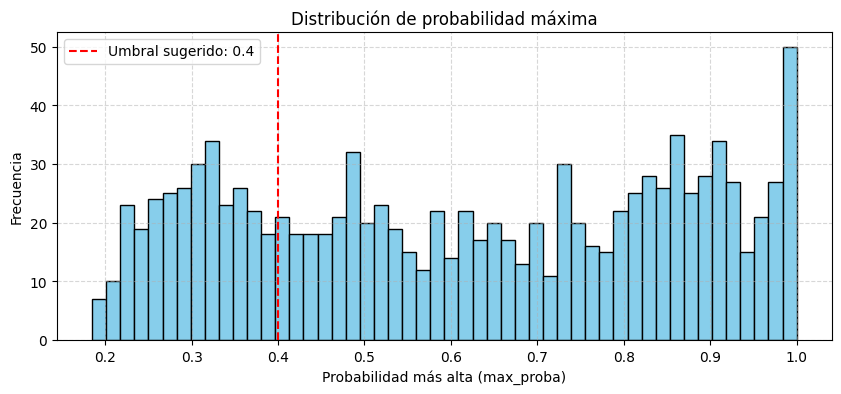

In [15]:
# Gráfico 1: Distribución de la probabilidad máxima
plt.figure(figsize=(10, 4))
plt.hist(features_parallel["max_proba"], bins=50, edgecolor='black', color='skyblue')
plt.axvline(x=0.4, color='red', linestyle='--', label='Umbral sugerido: 0.4')
plt.title("Distribución de probabilidad máxima")
plt.xlabel("Probabilidad más alta (max_proba)")
plt.ylabel("Frecuencia")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

<div class="alert alert-block alert-warning">
  <strong>🔎 Interpretación de la distribución de probabilidad máxima</strong><br><br>
  Este gráfico muestra qué tan seguro está el modelo al predecir cada superpíxel.<br><br>
  Se puede observar que aproximadamente <b>solo 50 superpíxeles</b> tienen una probabilidad cercana a <code>1.0</code>, lo que indica que el modelo está muy seguro al predecir esas clases.<br><br>
  En general, la gráfica parece <b>casi bimodal</b>, ya que hay muchas predicciones tanto con valores <code>&lt; 0.5</code> como con valores <code>&gt; 0.5</code>, lo cual sugiere que la mitad de los casos el modelo está seguro, y en la otra mitad no tanto.
</div>

<div class="alert alert-block alert-info">
  <strong> Umbral</strong><br>
</div>


<div class="alert alert-block alert-info">
  <strong>📌 Estrategia 1: Basada solo en la diferencia entre la probabilidad más alta y la segunda más alta</strong><br><br>
  De acuerdo al análisis de la <b>distribución de la diferencia de probabilidades</b>, se definió un <b>umbral de 0.02</b>. <br><br>
  Si la diferencia entre la probabilidad más alta y la segunda más alta es <b>menor a 0.02</b>, se considera que el modelo tiene <b>alta incertidumbre</b> entre dos clases y se asigna la categoría <code>10</code> ("Sin etiqueta").<br><br>
  Además, se contabiliza cuántos superpíxeles fueron reasignados con base en esta estrategia.
</div>

In [16]:
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# ESTRATEGIA 1: Basada solo en la diferencia entre la probabilidad más alta y la segunda más alta
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

# Definir umbral para la diferencia
umbral_dif_simple = 0.02

# Asignar 'Sin etiqueta' (categoría 10) si la diferencia es menor al umbral
features_parallel["prediction_actual_dif"] = np.where(
    features_parallel["dif_proba"] < umbral_dif_simple,
    10,  # Código para "Sin etiqueta"
    features_parallel["prediction"]
)

# Contar cuántos superpíxeles fueron reasignados
num_cambiados_dif = (features_parallel["dif_proba"] < umbral_dif_simple).sum()
print(f" Estrategia 1: Número de superpíxeles que serán cambiados, como Sin etiqueta baja diferencia: {num_cambiados_dif}")


 Estrategia 1: Número de superpíxeles que serán cambiados, como Sin etiqueta baja diferencia: 36


<div class="alert alert-block alert-info">
  <strong>💾 Guardado del archivo con predicciones por superpíxel</strong><br><br>
  Una vez finalizada la predicción, se guarda un archivo <code>.csv</code> con el nombre <code>Caract_paralelo_[nombre_imagen].csv</code>, que incluye:<br><br>
  <ul>
    <li>Las características extraídas de cada superpíxel.</li>
    <li>La categoría predicha por el modelo (<code>prediction</code>).</li>
    <li>La probabilidad máxima (<code>max_proba</code>) y la segunda más alta (<code>2da_proba_max</code>).</li>
    <li>La diferencia entre ambas (<code>dif_proba</code>) para evaluar la certeza del modelo.</li>
    <li><code>prediction_actual_dif</code>: predicción ajustada asignando "Sin etiqueta" si la diferencia de probabilidad es baja.</li>
  </ul><br>
  Este archivo permite documentar y reutilizar los resultados sin necesidad de repetir el proceso de segmentación y predicción. Además, incorpora estrategias de manejo de incertidumbre que ayudan a mejorar la interpretación de los resultados en contextos reales.
</div>

In [17]:
# Guardar el CSV con la predicción
nombre_csv = f"Caract_paralelo_{os.path.splitext(os.path.basename(rut_image))[0]}.csv"
features_parallel.to_csv(nombre_csv, index=False)
print(f" Archivo CSV guardado: {nombre_csv}")

 Archivo CSV guardado: Caract_paralelo_image_x5_331.csv


<div class="alert alert-block alert-success"> <strong>ℹ️ Ahora si podemos proseguir en la llamada de la siguiente función </strong><br>
<div>

<div class="alert alert-block alert-info"> <strong>ℹ️ Llamada de la función <code>img_etiquetas_parallel</code></strong><br> Esta función pinta de manera paralela los superpíxeles clasificados sobre una imagen original, utilizando múltiples hilos para acelerar el proceso. También calcula las proporciones de píxeles por categoría y genera una visualización con leyenda.<br><br> <b>Parámetros de entrada:</b> <ul> <li><code>indices</code>: Lista de índices de superpíxeles que fueron clasificados.</li> <li><code>prediction</code>: Lista con la categoría predicha para cada índice.</li> <li><code>Labels_slic</code>: Matriz de etiquetas por superpíxel (salida de SLIC).</li> <li><code>path_image</code>: Ruta de la imagen original.</li> <li><code>img_seg</code>: Imagen segmentada (superpíxeles, para superponer).</li> <li><code>num_threads</code>: Número de hilos para paralelizar el pintado.</li> </ul> </div> <div class="alert alert-block alert-info"> <strong>🖌️ Función auxiliar <code>pintar_bloque</code></strong><br> Esta función es llamada internamente por <code>img_etiquetas_parallel</code> y pinta un rango de superpíxeles directamente sobre una copia de la imagen original. Usa los colores definidos para cada categoría en <code>color_dict</code> y emplea erosión para suavizar los bordes de los superpíxeles.

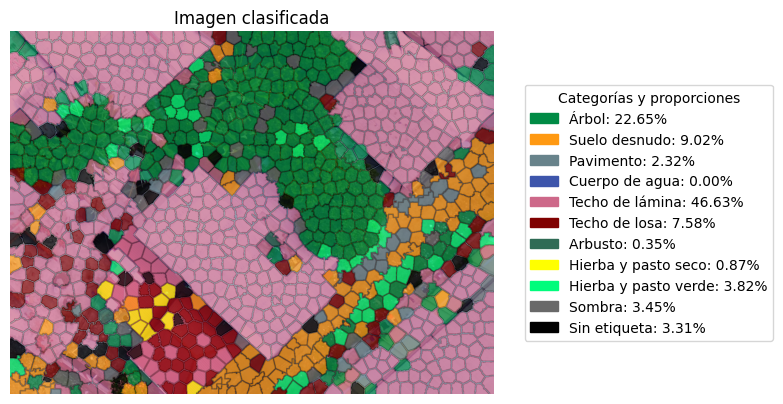

In [18]:
# ----------------------------------------------------------
#  Importar la función para pintar etiquetas en paralelo
# ----------------------------------------------------------
from funciones_auxiliares_predicciones import img_etiquetas_parallel


num_hilos_pintado = 6

# ----------------------------------------------------------
#  Ejecutar pintado y cálculo de proporciones
# ----------------------------------------------------------
total_time_pintado_parallel, total_time_proporcion = img_etiquetas_parallel(
    indices = features_parallel["indice"],
    prediction = features_parallel["prediction_actual_dif"],
    Labels_slic = Labels_slic_parallel,
    path_image = rut_image,
    img_seg = img_seg_parallel,
    num_threads = num_hilos_pintado
)


 </div> <div class="alert alert-block alert-info"> <strong>📤 Valores de salida de <code>img_etiquetas_parallel</code></strong><br> La función retorna una tupla con los siguientes elementos: <ul> <li><code>total_time_pintado_parallel</code>: Tiempo total dedicado al proceso de pintado paralelo (en segundos).</li> <li><code>total_time_proporcion</code>: Tiempo total dedicado al cálculo de proporciones por categoría (en segundos).</li> </ul> Además: <ul> <li>Se guarda la imagen etiquetada como <code>[nombre]_clasificada.png</code> en disco.</li> <li>Se genera una visualización con la imagen pintada y una leyenda con proporciones por categoría.</li> </ul> </div>

In [19]:
# ----------------------------------------------------------
#  Mostrar tiempos de procesamiento
# ----------------------------------------------------------
print(f" Tiempo de pintado paralelo: {total_time_pintado_parallel} segundos")
print(f" Tiempo de cálculo de proporciones: {total_time_proporcion} segundos")

 Tiempo de pintado paralelo: 3.8438 segundos
 Tiempo de cálculo de proporciones: 3.1182 segundos


<div class="alert alert-block alert-info"> <strong>ℹ️ Llamada de la función <code>calcular_proporcion_pixeles</code></strong><br> Esta función calcula el porcentaje de píxeles asignado a cada categoría dentro de una imagen clasificada por superpíxeles. Es utilizada para generar estadísticas resumen y leyendas visuales.<br><br> <b>Parámetros de entrada:</b> <ul> <li><code>indices</code>: Lista o arreglo con los índices de superpíxeles que fueron clasificados.</li> <li><code>prediction</code>: Lista con la categoría predicha para cada índice (numérica o string).</li> <li><code>Labels_slic</code>: Matriz 2D con las etiquetas de superpíxel asignadas a cada píxel (misma forma que la imagen original).</li> <li><code>img_shape</code>: Tupla con las dimensiones de la imagen original (<code>alto, ancho</code>), no utilizada directamente en esta función.</li> </ul> </div>

In [23]:
from funciones_auxiliares_predicciones import calcular_proporcion_pixeles

# Diccionario que asocia cada código con su categoría
categorias_dict = {
    0: "Árbol",
    1: "Suelo Desnudo",
    2: "Pavimento",
    3: "Cuerpo de Agua",
    4: "Techo de lámina",
    5: "Techo de losa",
    6: "Arbusto",
    7: "Hierba y pasto seco",
    8: "Hierba y pasto verde",
    9: "Sombra",
    10: "Sin etiqueta"
}

# ---------------------------------------------
# Llamada de la funcion de proporciones usando la primera estrategia
# ---------------------------------------------
proporcion_superpixeles_pred_dif = calcular_proporcion_pixeles(
    features_parallel["indice"].to_numpy(),
    features_parallel["prediction_actual_dif"].to_numpy(),
    Labels_slic_parallel, 
    rut_image,       # la ruta de la imagen original
)

<div class="alert alert-block alert-info"> <strong>📤 Valores de salida de <code>calcular_proporcion_pixeles</code></strong><br> La función retorna un <code>diccionario</code> con las categorías como llaves y el porcentaje de píxeles como valores.  </div>

In [24]:
# ----------------------------------------------------------
#  Mostrar resultado
# ----------------------------------------------------------
print(" Proporciones de superpíxeles usando la estrategia 1:")
for categoria, porcentaje in proporcion_superpixeles_pred_dif.items():
    print(f" - {categoria}: {porcentaje:.2f}%")

 Proporciones de superpíxeles usando la estrategia 1:
 - Árbol: 22.65%
 - Suelo desnudo: 9.02%
 - Pavimento: 2.32%
 - Cuerpo de agua: 0.00%
 - Techo de lámina: 46.63%
 - Techo de losa: 7.58%
 - Arbusto: 0.35%
 - Hierba y pasto seco: 0.87%
 - Hierba y pasto verde: 3.82%
 - Sombra: 3.45%
 - Sin etiqueta: 3.31%


<div class="alert alert-block alert-info"> <strong>ℹ️ Llamada de la función <code>ver_superpixeles_categoria</code></strong><br> Esta función permite visualizar únicamente los superpíxeles pertenecientes a una categoría específica, dejando en negro el resto de la imagen. Es útil para verificar visualmente la segmentación y clasificación por clases.<br><br> <b>Parámetros de entrada:</b> <ul> <li><code>indices</code>: Lista o arreglo con los índices de superpíxeles procesados.</li> <li><code>predicciones</code>: Vector de etiquetas predichas por superpíxel.</li> <li><code>Labels_slic</code>: Matriz con la etiqueta de superpíxel asignada a cada píxel (output de SLIC).</li> <li><code>path_image</code>: Ruta de la imagen original.</li> <li><code>categoria_objetivo</code>: Índice de la categoría que se desea visualizar (por defecto = <code>10</code>, "Sin etiqueta").</li> </ul> </div>

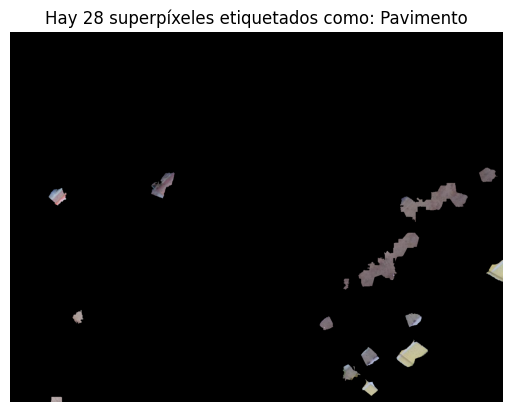

In [26]:
# ----------------------------------------------------------
#  Importación de la función
# ----------------------------------------------------------
from funciones_auxiliares_predicciones import ver_superpixeles_categoria

# ----------------------------------------------------------
#  Visualizar superpíxeles clasificados como una categoría específica
# ----------------------------------------------------------
# Por ejemplo: categoría 2 corresponde a "Pavimento"
categoria_a_visualizar = 2

ver_superpixeles_categoria(
    features_parallel["indice"].to_numpy(),
    features_parallel["prediction_actual_dif"].to_numpy(),
    Labels_slic_parallel,
    rut_image,                  # ruta de la imagen original
    categoria_objetivo=categoria_a_visualizar  # categoría que se va inspeccionar
)

<div class="alert alert-block alert-info"> <strong>📤 Salida de <code>ver_superpixeles_categoria</code></strong><br> <ul> <li>Muestra una imagen donde solo los superpíxeles pertenecientes a la categoría objetivo conservan su color original.</li> <li>El resto de la imagen aparece en negro.</li> <li>Incluye un título con el número total de superpíxeles detectados para esa categoría.</li> </ul> </div>